In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [3]:
full_result_0 = pd.read_csv("./result_iot23/cm_0.csv")

In [4]:
full_result_0

,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch
0,0.142068,0.969748,0.140252,0.968448,0,248,0,7612,1
1,0.131019,0.971498,0.139979,0.968448,0,248,0,7612,2
2,0.129941,0.971498,0.140769,0.968448,0,248,0,7612,3
3,0.130328,0.971498,0.143968,0.968448,0,248,0,7612,4
4,0.130325,0.971498,0.139733,0.968448,0,248,0,7612,5
5,0.130043,0.971498,0.141158,0.968448,0,248,0,7612,6
6,0.129976,0.971498,0.139584,0.968448,0,248,0,7612,7
7,0.129658,0.971498,0.139389,0.968448,0,248,0,7612,8
8,0.130030,0.971498,0.139158,0.968448,0,248,0,7612,9
9,0.129501,0.971498,0.139185,0.968448,0,248,0,7612,10


In [4]:
def draw_results(history_df):
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.ylim(0.7,1.0)
    plt.plot(history_df['epoch'], history_df['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_df:
        plt.plot(history_df['epoch'], history_df['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.ylim(0.0,0.6)
    plt.plot(history_df['epoch'], history_df['loss'], label='Training Loss')
    if 'val_loss' in history_df:
        plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [5]:
def cal_metric(df_cm):
    df_cm["tpr"] = df_cm['val_TP']/(df_cm['val_TP']+ df_cm['val_FN'])
    df_cm["far"] = df_cm['val_FP']/(df_cm['val_FP']+ df_cm['val_TN'])
    df_cm["precision"] = df_cm['val_TP']/(df_cm['val_TP']+ df_cm['val_FP'])
    df_cm["F1"] = 2*df_cm['tpr']*df_cm['precision']/(df_cm['tpr']+ df_cm['precision'])

In [6]:
def draw_metrics(history_df):
    plt.figure(figsize=(10, 6))
    plt.plot(history_df['epoch'], history_df['tpr'], label='True positive rate')
    plt.plot(history_df['epoch'], history_df['far'], label='False alarm rate')
    plt.plot(history_df['epoch'], history_df['precision'], label='Precision')
    plt.plot(history_df['epoch'], history_df['F1'], label='F1-score')
    plt.xlabel('Epoch')
    plt.ylabel('Rate')
    plt.title('Matrics')
    plt.legend()
    
    plt.show()

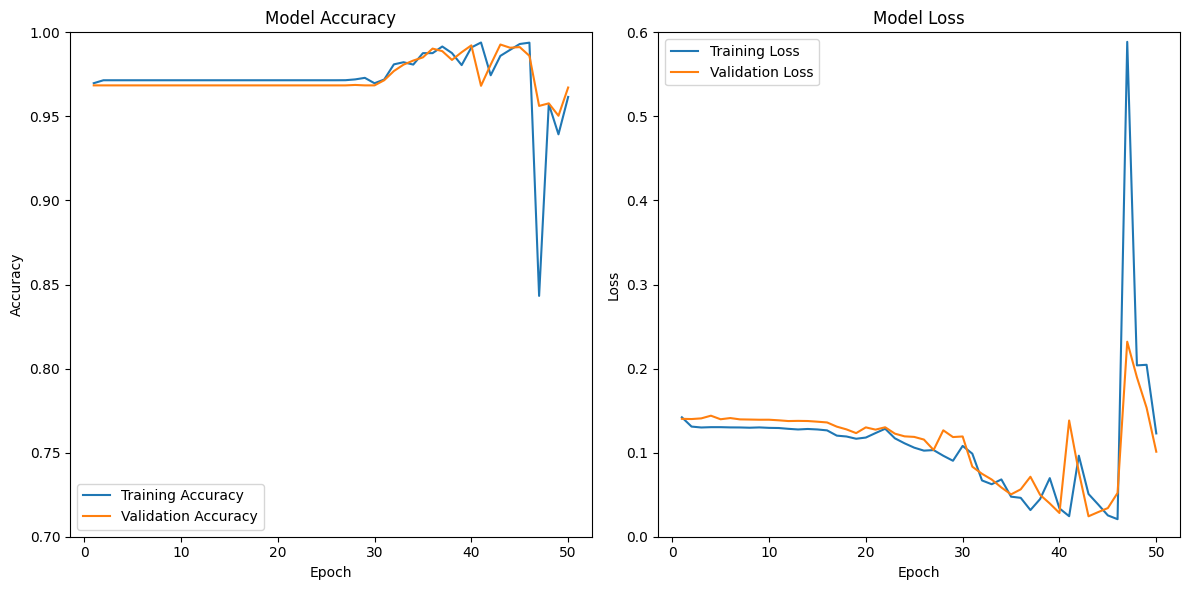

In [6]:
draw_results(full_result_0)

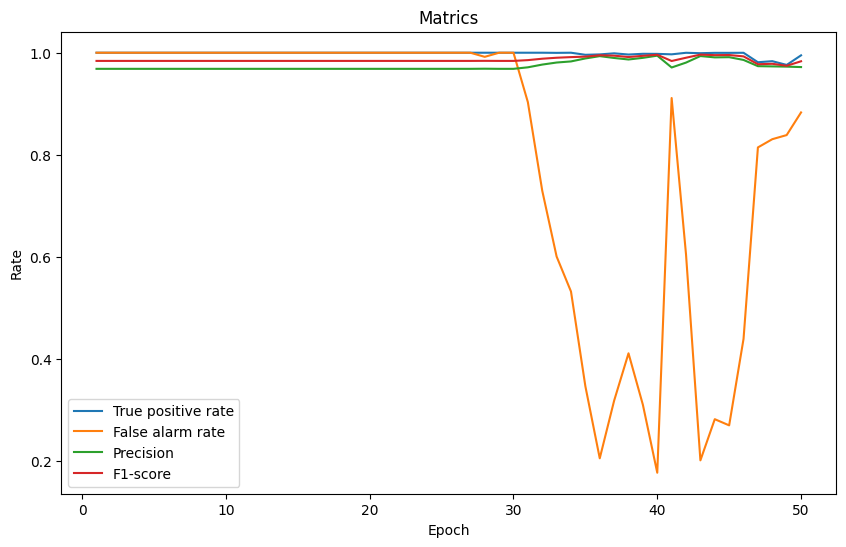

In [14]:
cal_metric(full_result_0)
draw_metrics(full_result_0)

In [17]:
full_result_1 = pd.read_csv("./result_iot23/cm_1.csv")
cal_metric(full_result_1)
full_result_1

,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch,tpr,far,precision,F1
0,0.140995,0.970480,0.140807,0.968448,0,248,0,7612,1,1.0,1.0,0.968448,0.983971
1,0.130769,0.971498,0.139998,0.968448,0,248,0,7612,2,1.0,1.0,0.968448,0.983971
2,0.130766,0.971498,0.140376,0.968448,0,248,0,7612,3,1.0,1.0,0.968448,0.983971
3,0.130304,0.971498,0.141167,0.968448,0,248,0,7612,4,1.0,1.0,0.968448,0.983971
4,0.130278,0.971498,0.139667,0.968448,0,248,0,7612,5,1.0,1.0,0.968448,0.983971
5,0.130122,0.971498,0.139554,0.968448,0,248,0,7612,6,1.0,1.0,0.968448,0.983971
6,0.129858,0.971498,0.139558,0.968448,0,248,0,7612,7,1.0,1.0,0.968448,0.983971
7,0.129753,0.971498,0.139283,0.968448,0,248,0,7612,8,1.0,1.0,0.968448,0.983971
8,0.129473,0.971498,0.139615,0.968448,0,248,0,7612,9,1.0,1.0,0.968448,0.983971
9,0.129561,0.971498,0.138612,0.968448,0,248,0,7612,10,1.0,1.0,0.968448,0.983971


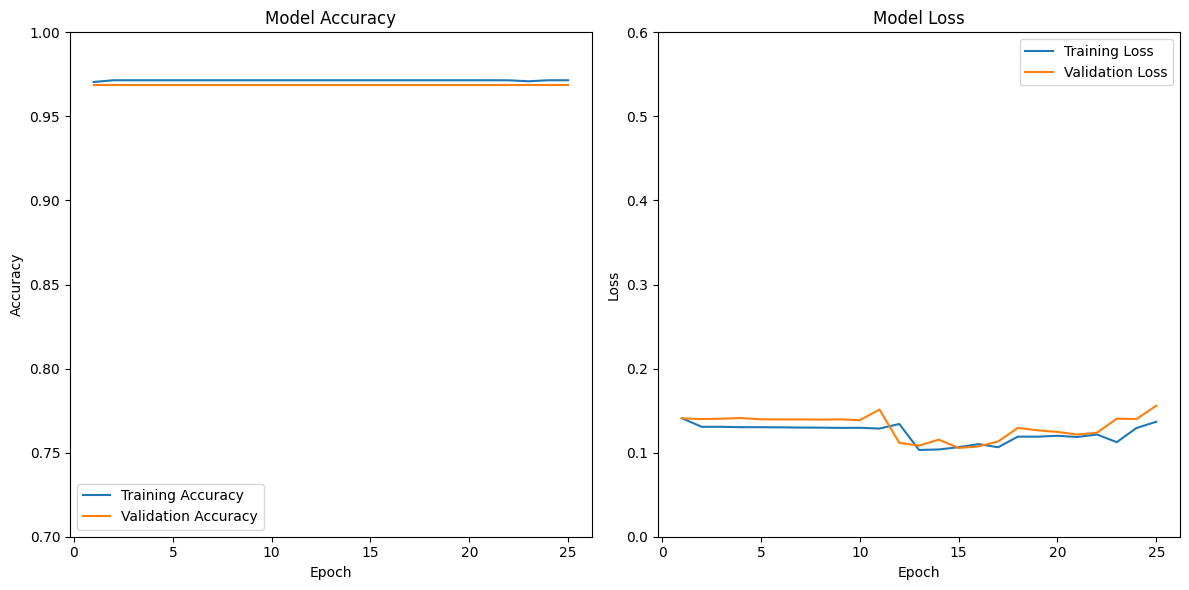

In [7]:

draw_results(full_result_1)

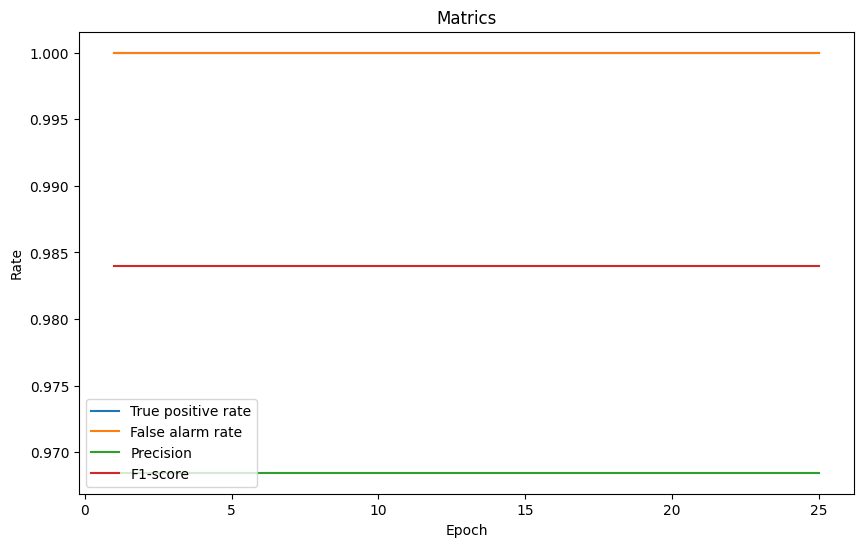

In [15]:

draw_metrics(full_result_1)

In [18]:
full_result_2 = pd.read_csv("./result_iot23/cm_2.csv")
cal_metric(full_result_2)
full_result_2


,loss,accuracy,val_loss,val_accuracy,val_TN,val_FP,val_FN,val_TP,epoch,tpr,far,precision,F1
0,0.143957,0.970193,0.141137,0.968448,0,248,0,7612,1,1.0,1.0,0.968448,0.983971
1,0.130551,0.971498,0.140501,0.968448,0,248,0,7612,2,1.0,1.0,0.968448,0.983971
2,0.130318,0.971498,0.140117,0.968448,0,248,0,7612,3,1.0,1.0,0.968448,0.983971
3,0.130575,0.971498,0.140104,0.968448,0,248,0,7612,4,1.0,1.0,0.968448,0.983971
4,0.130516,0.971498,0.140951,0.968448,0,248,0,7612,5,1.0,1.0,0.968448,0.983971
5,0.129889,0.971498,0.141688,0.968448,0,248,0,7612,6,1.0,1.0,0.968448,0.983971
6,0.130169,0.971498,0.139481,0.968448,0,248,0,7612,7,1.0,1.0,0.968448,0.983971
7,0.129446,0.971498,0.139617,0.968448,0,248,0,7612,8,1.0,1.0,0.968448,0.983971
8,0.129706,0.971498,0.138932,0.968448,0,248,0,7612,9,1.0,1.0,0.968448,0.983971
9,0.129291,0.971498,0.138501,0.968448,0,248,0,7612,10,1.0,1.0,0.968448,0.983971


In [ ]:
draw_results(full_result_2)

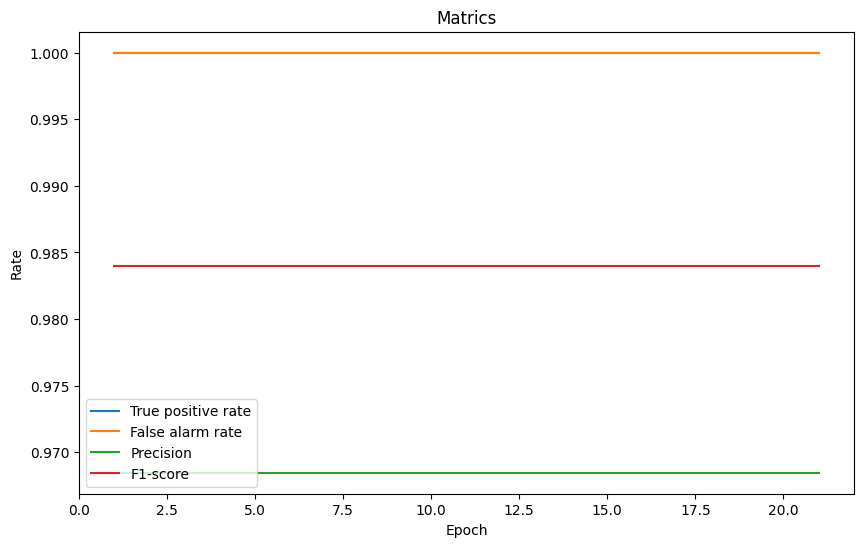

In [16]:
cal_metric(full_result_2)
draw_metrics(full_result_2)

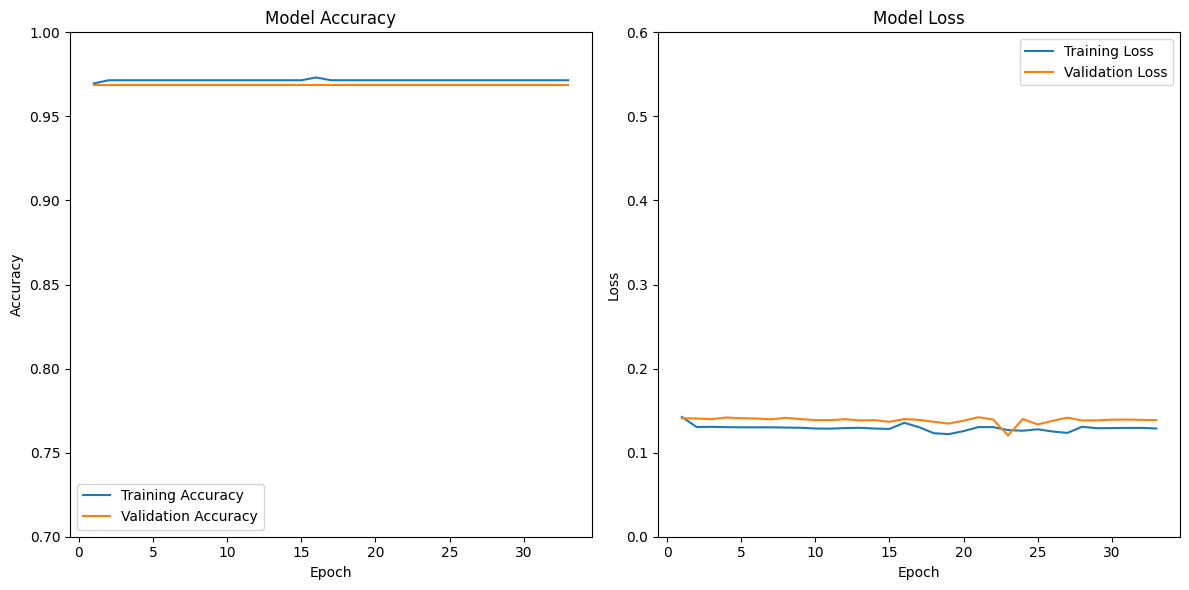

In [9]:
full_result_3 = pd.read_csv("./result_iot23/cm_3.csv")
draw_results(full_result_3)

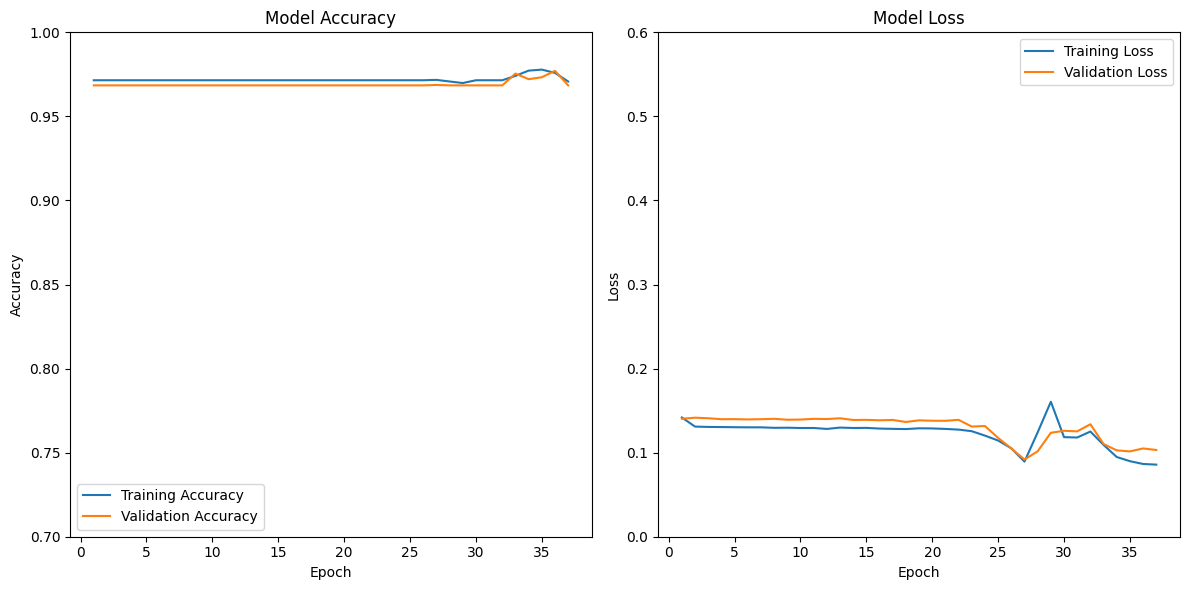

In [10]:
full_result_4 = pd.read_csv("./result_iot23/cm_4.csv")
draw_results(full_result_4)

# 07/06

## finished training with 34 and 5, now to plot the results

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
import pandas as pd

In [7]:
def cal_metric(df_cm):
    df_cm["tpr"] = df_cm['val_TP']/(df_cm['val_TP']+ df_cm['val_FN'])
    df_cm["far"] = df_cm['val_FP']/(df_cm['val_FP']+ df_cm['val_TN'])
    df_cm["precision"] = df_cm['val_TP']/(df_cm['val_TP']+ df_cm['val_FP'])
    df_cm["F1"] = 2*df_cm['tpr']*df_cm['precision']/(df_cm['tpr']+ df_cm['precision'])

In [3]:
def draw_results(history_df):
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.ylim(0.7,1.0)
    plt.plot(history_df['epoch'], history_df['accuracy'], label='Training Accuracy')
    if 'val_accuracy' in history_df:
        plt.plot(history_df['epoch'], history_df['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.ylim(0.0,0.6)
    plt.plot(history_df['epoch'], history_df['loss'], label='Training Loss')
    if 'val_loss' in history_df:
        plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [10]:
def draw_metrics(history_df):
    plt.figure(figsize=(10, 6))
    plt.plot(history_df['epoch'], history_df['tpr'], label='True positive rate')
    plt.plot(history_df['epoch'], history_df['far'], label='False alarm rate')
    plt.plot(history_df['epoch'], history_df['precision'], label='Precision')
    plt.plot(history_df['epoch'], history_df['F1'], label='F1-score')
    plt.xlabel('Epoch')
    plt.ylabel('Rate')
    plt.title('Matrics')
    plt.legend()
    
    plt.show()

In [5]:
h5_0705_1 = pd.HDFStore("./result_iot23/cm_0705_1.h5")
df_0705_1 = h5_0705_1['/df']
cal_metric(df_0705_1)

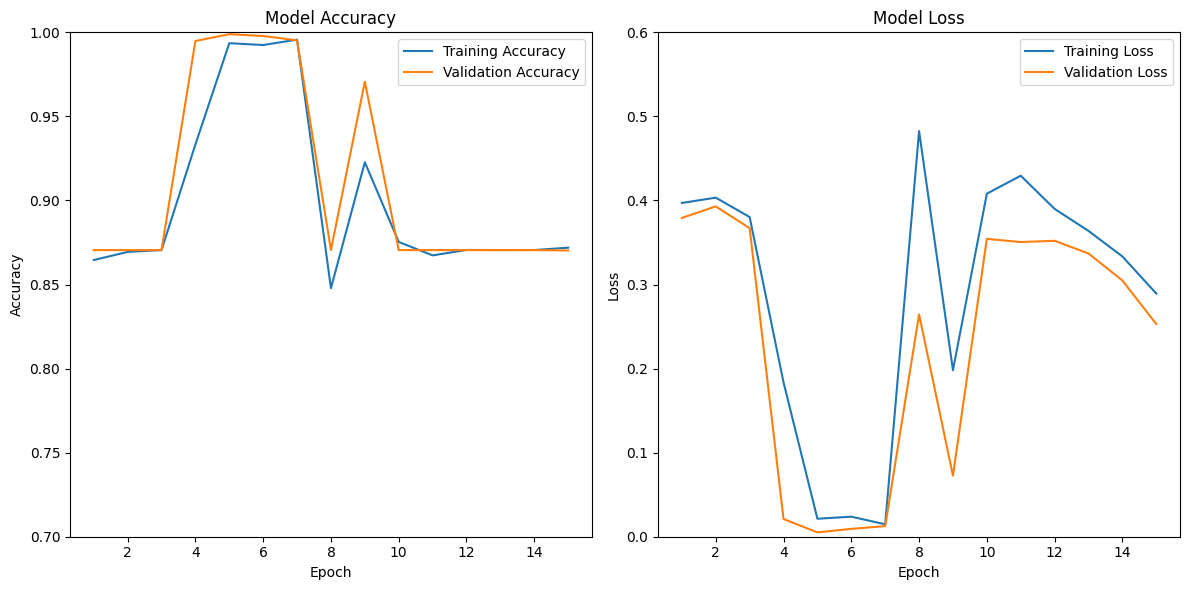

In [6]:
draw_results(df_0705_1)

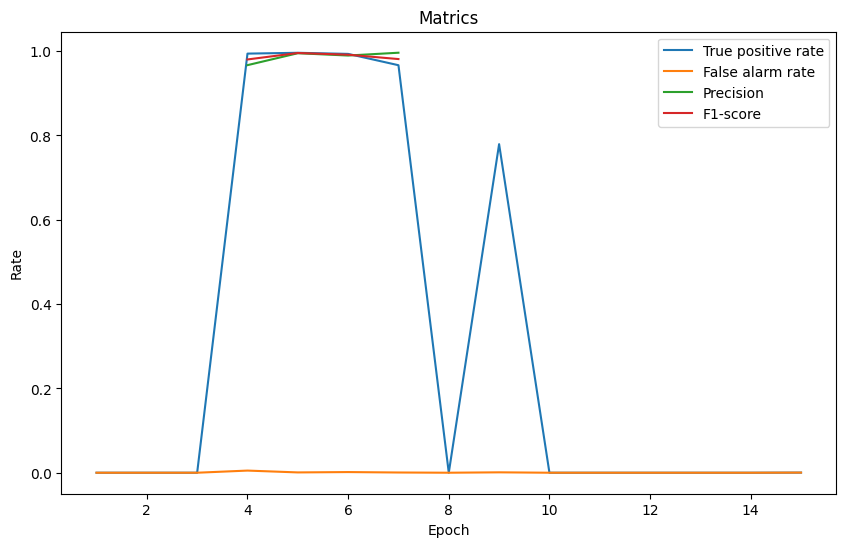

In [7]:
draw_metrics(df_0705_1)

# 07/08

## Plot date in progress

The training still goes on, and no more time. As the results are good enough, here I plot the intermiedate results.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
cm_sample = [[int(51282.0000), int(8.0000)], 
           [int(6.0000),int(7625.0000)]]

In [17]:
def draw_cm(cm_list):
    plt.figure(figsize=(8, 6))
    cm_list = np.array(cm_list)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm_list.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm_list.flatten()/np.sum(cm_list)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # sns.set_theme(rc={"figure.dpi": 96})
    sns.heatmap(cm_list, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 18})

    # plt.title('Confusion matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.savefig("./cm_23_heatmap.svg", format='svg')
    plt.show()

In [18]:
draw_cm(cm_sample)

NameError: name 'cm_sample' is not defined

In [57]:
import re
from matplotlib.ticker import MaxNLocator

In [63]:
def get_epoch_results(file_path):

    # Read the contents of the file
    with open(file_path, 'r') as file:
        output = file.read()

    # Regular expressions for epoch summary data
    # epoch_pattern = re.compile(r'\d+/(\d+) \[=+\] - \d+s \d+s/step - loss: (.*?) - accuracy: (.*?) - val_loss: (.*?) - val_accuracy: (.*?)\s')
    # epoch_pattern = re.compile(r'\d+/(\d+) \[=+\] - \d+s \d+m?s/step - loss: (.*?) - accuracy: (.*?) - val_loss: (.*?) - val_accuracy: (.*)')
    # pattern = r"Preci[^\d]*(\d\.\d{4}) - Reca[^\d]*(\d\.\d{4}) - accur[^\d]*(\d\.\d{4}) - loss: (\d\.\d{4}) - val_Preci[^\d]*(\d\.\d{4}e[+|-]\d{2}) - val_Reca[^\d]*(\d\.\d{4}e[+|-]\d{2}) - val_accura[^\d]*(\d\.\d{4}) - val_loss: (\d\.\d{4}) - .* val_TN: (\d+.\d+) - val_FP: (\d\.\d{4}e[+|-]\d{2}) - val_FN: (\d+.\d+) - val_TP: (\d\.\d{4}e[+|-]\d{2})"
    # pattern = r"Preci[^\d]*(\d\.\d{4}e[+\-]\d{2}) - Reca[^\d]*(\d\.\d{4}e[+\-]\d{2}) - accur[^\d]*(\d\.\d{4}) - loss: (\d\.\d{4}) - val_Preci[^\d]*(\d\.\d{4}e[+\-]\d{2}) - val_Reca[^\d]*(\d\.\d{4}e[+\-]\d{2}) - val_accura[^\d]*(\d\.\d{4}) - val_loss: (\d\.\d{4}) - .* val_TN: (\d+\.\d+) - val_FP: (\d\.\d{4}e[+\-]\d{2}) - val_FN: (\d+\.\d+) - val_TP: (\d\.\d{4}e[+\-]\d{2})"
    # pattern = r"Precision: (.*?) - Recall: (.*?) - accuracy: (.*?) - loss: (.*?) - val_Precision: (.*?) - val_Recall: (.*?) - val_accuracy: (.*?) - val_loss: (.*?) - learning_rate: (.*?) - val_TN: (.*?) - val_FP: (.*?) - val_FN: (.*?) - val_TP: (.*?)"
    pattern = r"Precision: ([\d\.e\-+]+) - Recall: ([\d\.e\-+]+) - accuracy: ([\d\.e\-+]+) - loss: ([\d\.e\-+]+) - val_Precision: ([\d\.e\-+]+) - val_Recall: ([\d\.e\-+]+) - val_accuracy: ([\d\.e\-+]+) - val_loss: ([\d\.e\-+]+) - learning_rate: ([\d\.e\-+]+) - val_TN: ([\d\.e\-+]+) - val_FP: ([\d\.e\-+]+) - val_FN: ([\d\.e\-+]+) - val_TP: ([\d\.e\-+]+)"

    # Find all matches in the output
    # epoch_data = epoch_pattern.findall(output)
    matches = re.findall(pattern, output)

    epoch_results = []

    for i, (precision, recall, accuracy, loss, val_precision, val_recall, val_accuracy, val_loss, _, val_TN, val_FP, val_FN, val_TP) in enumerate(matches, start=1):
        epoch_results.append({
            'epoch': i,  # Manually assign epoch numbers starting from 1
            'loss': float(loss),
            'accuracy': float(accuracy),
            'val_loss': float(val_loss),
            'val_accuracy': float(val_accuracy),
            'precision': float(precision),
            'recall': float(recall),
            'val_precision': float(val_precision),
            'val_recall': float(val_recall),
            'val_TN': int(float(val_TN)),
            'val_FP': int(float(val_FP)),
            'val_FN': int(float(val_FN)),
            'val_TP': int(float(val_TP)),
        })
    epoch_df = pd.DataFrame(epoch_results)
    return epoch_df

In [8]:
import matplotlib.pyplot as plt

def draw_results(history_df):
    plt.figure(figsize=(12, 6))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.ylim(0.7,1.0)
    plt.plot(history_df['epoch'], history_df['accuracy'], label='Training Accuracy')
    plt.plot(history_df['epoch'], history_df['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    # plt.title('Model Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.ylim(0.0,0.6)
    plt.plot(history_df['epoch'], history_df['loss'], label='Training Loss')
    plt.plot(history_df['epoch'], history_df['val_loss'], label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    # plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [69]:
df_34_5 = get_epoch_results("./slurm-36257861.out")

In [70]:
df_34_5

,epoch,loss,accuracy,val_loss,val_accuracy,precision,recall,val_precision,val_recall,val_TN,val_FP,val_FN,val_TP
0,1,0.3948,0.8670,0.381800,0.8705,0.0774,0.0026,0.0000,0.0000,51290,0,7631,0
1,2,0.3855,0.8709,0.381000,0.8705,0.0000,0.0000,0.0000,0.0000,51290,0,7631,0
2,3,0.3799,0.8706,0.362300,0.8705,0.0000,0.0000,0.0000,0.0000,51290,0,7631,0
3,4,0.3597,0.8711,0.312800,0.8705,0.1963,0.0150,0.0000,0.0000,51290,0,7631,0
4,5,0.2555,0.8924,0.031100,0.9895,0.8621,0.1790,0.9788,0.9392,51135,155,464,7167
5,6,0.0352,0.9893,0.010900,0.9971,0.9632,0.9541,0.9807,0.9976,51140,150,18,7613
6,7,0.0132,0.9964,0.022200,0.9939,0.9842,0.9880,0.9700,0.9835,51058,232,126,7505
7,8,0.0218,0.9935,0.003400,0.9991,0.9681,0.9818,0.9943,0.9988,51246,44,9,7622
8,9,0.0222,0.9919,0.008100,0.9974,0.9661,0.9717,0.9817,0.9988,51148,142,9,7622
9,10,0.0159,0.9951,0.006200,0.9978,0.9792,0.9830,0.9845,0.9990,51170,120,8,7623


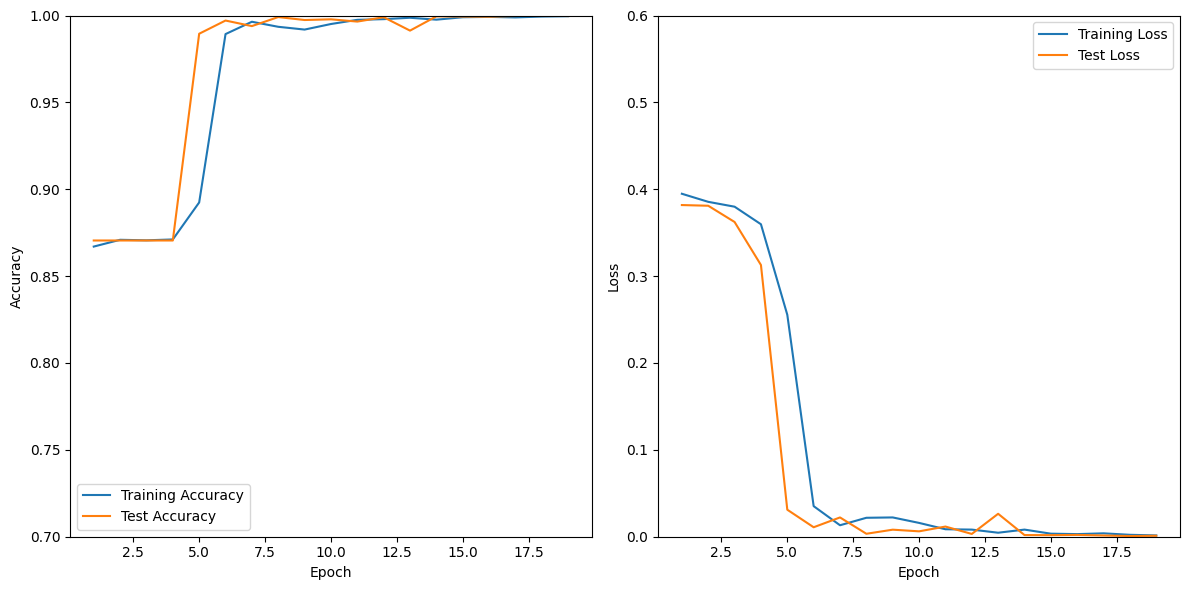

In [78]:
draw_results(df_34_5)

In [75]:
cal_metric(df_34_5)

In [76]:
df_34_5

,epoch,loss,accuracy,val_loss,val_accuracy,precision,recall,val_precision,val_recall,val_TN,val_FP,val_FN,val_TP,tpr,far,F1
0,1,0.3948,0.8670,0.381800,0.8705,NaN,0.0026,0.0000,0.0000,51290,0,7631,0,0.000000,0.000000,NaN
1,2,0.3855,0.8709,0.381000,0.8705,NaN,0.0000,0.0000,0.0000,51290,0,7631,0,0.000000,0.000000,NaN
2,3,0.3799,0.8706,0.362300,0.8705,NaN,0.0000,0.0000,0.0000,51290,0,7631,0,0.000000,0.000000,NaN
3,4,0.3597,0.8711,0.312800,0.8705,NaN,0.0150,0.0000,0.0000,51290,0,7631,0,0.000000,0.000000,NaN
4,5,0.2555,0.8924,0.031100,0.9895,0.978831,0.1790,0.9788,0.9392,51135,155,464,7167,0.939195,0.003022,0.958604
5,6,0.0352,0.9893,0.010900,0.9971,0.980678,0.9541,0.9807,0.9976,51140,150,18,7613,0.997641,0.002925,0.989087
6,7,0.0132,0.9964,0.022200,0.9939,0.970014,0.9880,0.9700,0.9835,51058,232,126,7505,0.983488,0.004523,0.976705
7,8,0.0218,0.9935,0.003400,0.9991,0.994260,0.9818,0.9943,0.9988,51246,44,9,7622,0.998821,0.000858,0.996535
8,9,0.0222,0.9919,0.008100,0.9974,0.981710,0.9717,0.9817,0.9988,51148,142,9,7622,0.998821,0.002769,0.990192
9,10,0.0159,0.9951,0.006200,0.9978,0.984502,0.9830,0.9845,0.9990,51170,120,8,7623,0.998952,0.002340,0.991674


# 07/08

## get results from exp, and here to draw it.

./result_iot23/cm_0705_2.h5

In [1]:
import pandas as pd
h5 = pd.HDFStore("./result_iot23/cm_0705_2.h5")
df_0705_2 = h5['df']
h5.close()

In [2]:
df_0705_2

,Precision,Recall,accuracy,loss,val_Precision,val_Recall,val_accuracy,val_loss,learning_rate,val_TN,val_FP,val_FN,val_TP,epoch
0,0.125743,0.004161,0.867290,0.391059,0.000000,0.000000,0.870488,0.381836,0.001,51290,0,7631,0,1
1,0.000000,0.000000,0.870498,0.385068,0.000000,0.000000,0.870488,0.380967,0.001,51290,0,7631,0,2
2,0.000000,0.000000,0.870498,0.377159,0.000000,0.000000,0.870488,0.362277,0.001,51290,0,7631,0,3
3,0.598366,0.057600,0.872950,0.341780,0.000000,0.000000,0.870488,0.312817,0.001,51290,0,7631,0,4
4,0.927872,0.496511,0.929799,0.171393,0.978831,0.939195,0.989494,0.031095,0.001,51135,155,464,7167,5
5,0.971257,0.967629,0.992099,0.026639,0.980678,0.997641,0.997149,0.010911,0.001,51140,150,18,7613,6
6,0.982867,0.986763,0.996058,0.013865,0.970014,0.983488,0.993924,0.022179,0.001,51058,232,126,7505,7
7,0.976267,0.986567,0.995154,0.016154,0.994260,0.998821,0.999101,0.003378,0.001,51246,44,9,7622,8
8,0.968149,0.973002,0.992358,0.021487,0.981710,0.998821,0.997437,0.008113,0.001,51148,142,9,7622,9
9,0.980934,0.984470,0.995511,0.014435,0.984502,0.998952,0.997828,0.006245,0.001,51170,120,8,7623,10


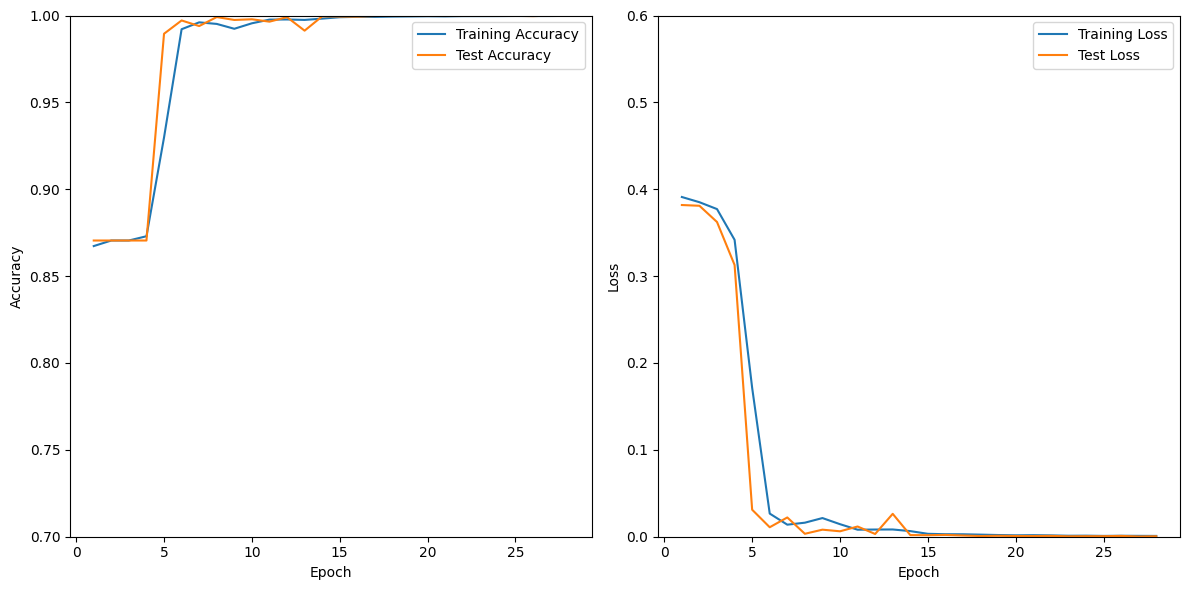

In [9]:
draw_results(df_0705_2)

In [10]:
cal_metric(df_0705_2)

In [11]:
df_0705_2

,Precision,Recall,accuracy,loss,val_Precision,val_Recall,val_accuracy,val_loss,learning_rate,val_TN,val_FP,val_FN,val_TP,epoch,tpr,far,precision,F1
0,0.125743,0.004161,0.867290,0.391059,0.000000,0.000000,0.870488,0.381836,0.001,51290,0,7631,0,1,0.000000,0.000000,NaN,NaN
1,0.000000,0.000000,0.870498,0.385068,0.000000,0.000000,0.870488,0.380967,0.001,51290,0,7631,0,2,0.000000,0.000000,NaN,NaN
2,0.000000,0.000000,0.870498,0.377159,0.000000,0.000000,0.870488,0.362277,0.001,51290,0,7631,0,3,0.000000,0.000000,NaN,NaN
3,0.598366,0.057600,0.872950,0.341780,0.000000,0.000000,0.870488,0.312817,0.001,51290,0,7631,0,4,0.000000,0.000000,NaN,NaN
4,0.927872,0.496511,0.929799,0.171393,0.978831,0.939195,0.989494,0.031095,0.001,51135,155,464,7167,5,0.939195,0.003022,0.978831,0.958604
5,0.971257,0.967629,0.992099,0.026639,0.980678,0.997641,0.997149,0.010911,0.001,51140,150,18,7613,6,0.997641,0.002925,0.980678,0.989087
6,0.982867,0.986763,0.996058,0.013865,0.970014,0.983488,0.993924,0.022179,0.001,51058,232,126,7505,7,0.983488,0.004523,0.970014,0.976705
7,0.976267,0.986567,0.995154,0.016154,0.994260,0.998821,0.999101,0.003378,0.001,51246,44,9,7622,8,0.998821,0.000858,0.994260,0.996535
8,0.968149,0.973002,0.992358,0.021487,0.981710,0.998821,0.997437,0.008113,0.001,51148,142,9,7622,9,0.998821,0.002769,0.981710,0.990192
9,0.980934,0.984470,0.995511,0.014435,0.984502,0.998952,0.997828,0.006245,0.001,51170,120,8,7623,10,0.998952,0.002340,0.984502,0.991674


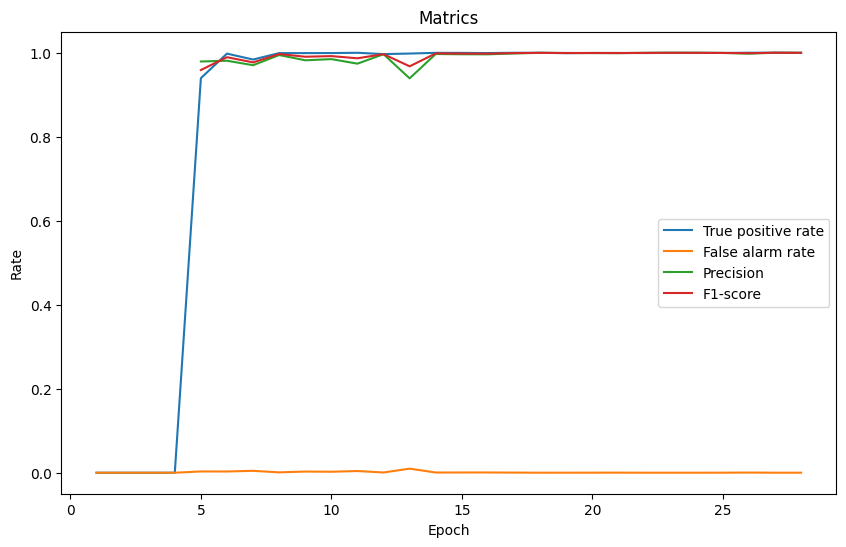

In [12]:
draw_metrics(df_0705_2)

In [13]:
def make_cm_list(df):
    cm = df.iloc[-1]
    cm_list = [[int(cm['val_TN']), int(cm['val_FP'])],[int(cm['val_FN']), int(cm['val_TP'])]]
    return cm_list

In [14]:
df_0705_2_cm = make_cm_list(df_0705_2)

In [22]:
df_0705_2_cm

[[51287, 3], [5, 7626]]

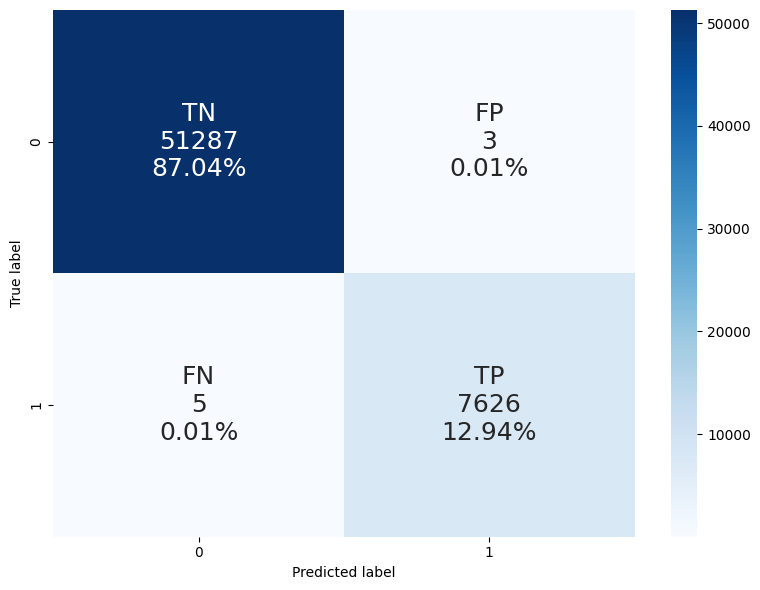

In [21]:
draw_cm(df_0705_2_cm)